In [20]:
# Bike Sharing Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
# Set style for plots
plt.style.use('seaborn')
%matplotlib inline

C:\Users\14AC0036AU\AppData\Local\Temp\ipykernel_21848\184966622.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [22]:
## 1. Data Loading and Initial Exploration
# Load the dataset
df = pd.read_csv('ola.csv')


In [23]:
# Display first 5 rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213


In [24]:
# Basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.5+ KB


In [25]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,season,weather,temp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.493937,2.491916,20.137973,59.946072,24.960981,24.517545,99.551442,124.068988
std,1.120531,1.123139,8.696625,22.987200,14.424684,14.390014,57.541131,59.449265
min,1.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.630000,40.040000,12.522500,12.000000,50.000000,74.000000
50%,2.000000,2.000000,20.190000,59.970000,25.000000,25.000000,100.000000,124.000000
75%,3.000000,4.000000,27.707500,79.620000,37.427500,37.000000,149.000000,174.000000
max,4.000000,4.000000,35.000000,99.980000,49.990000,49.000000,199.000000,248.000000


In [26]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [28]:
# 2. Data Cleaning and Preprocessing
# Convert datetime to datetime object and extract features
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6

In [29]:
# Map season numbers to names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)

# Map weather numbers to descriptions
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
df['weather_name'] = df['weather'].map(weather_map)

In [30]:
# Create a new column for total rentals
df['total_rentals'] = df['casual'] + df['registered']

# Verify that our total matches the 'count' column
assert (df['total_rentals'] == df['count']).all(), "Total rentals calculation is incorrect"

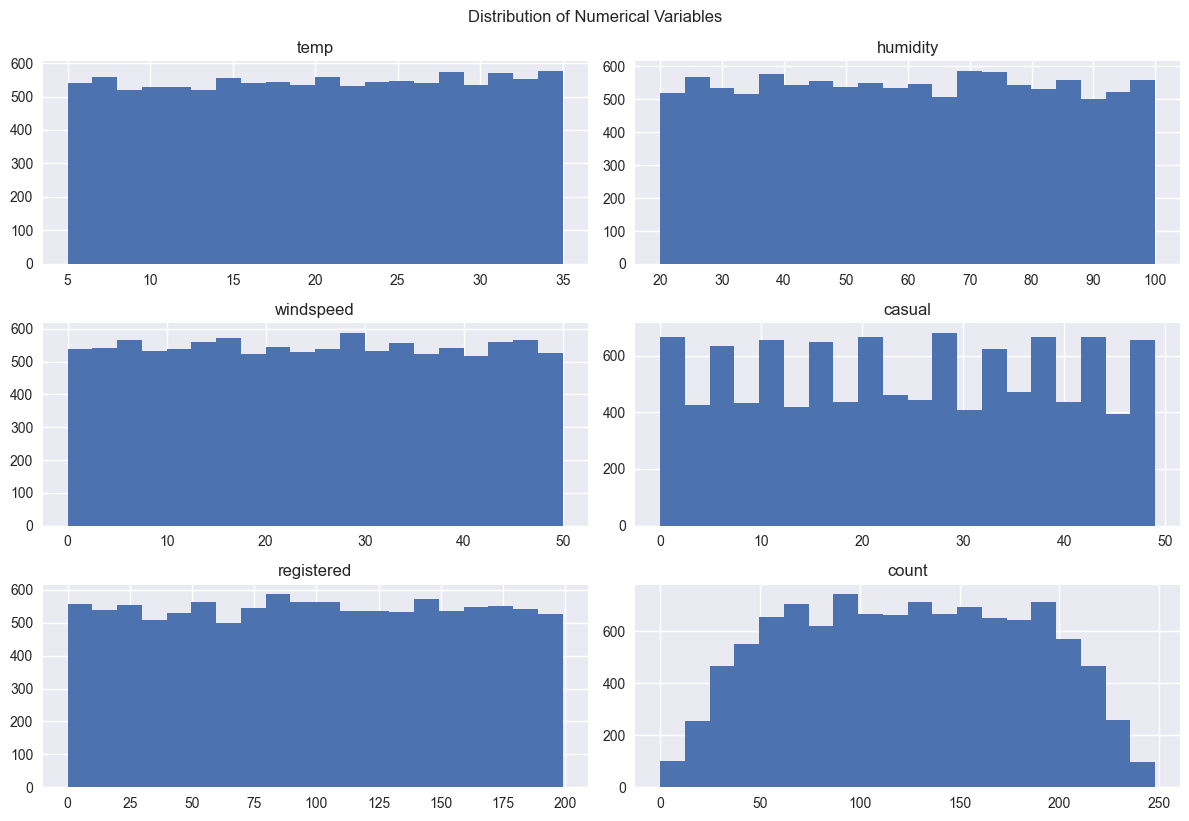

In [31]:

# 3. Exploratory Data Analysis (EDA)
# Plot distributions of numerical variables
num_cols = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', y=1.02)
plt.show()

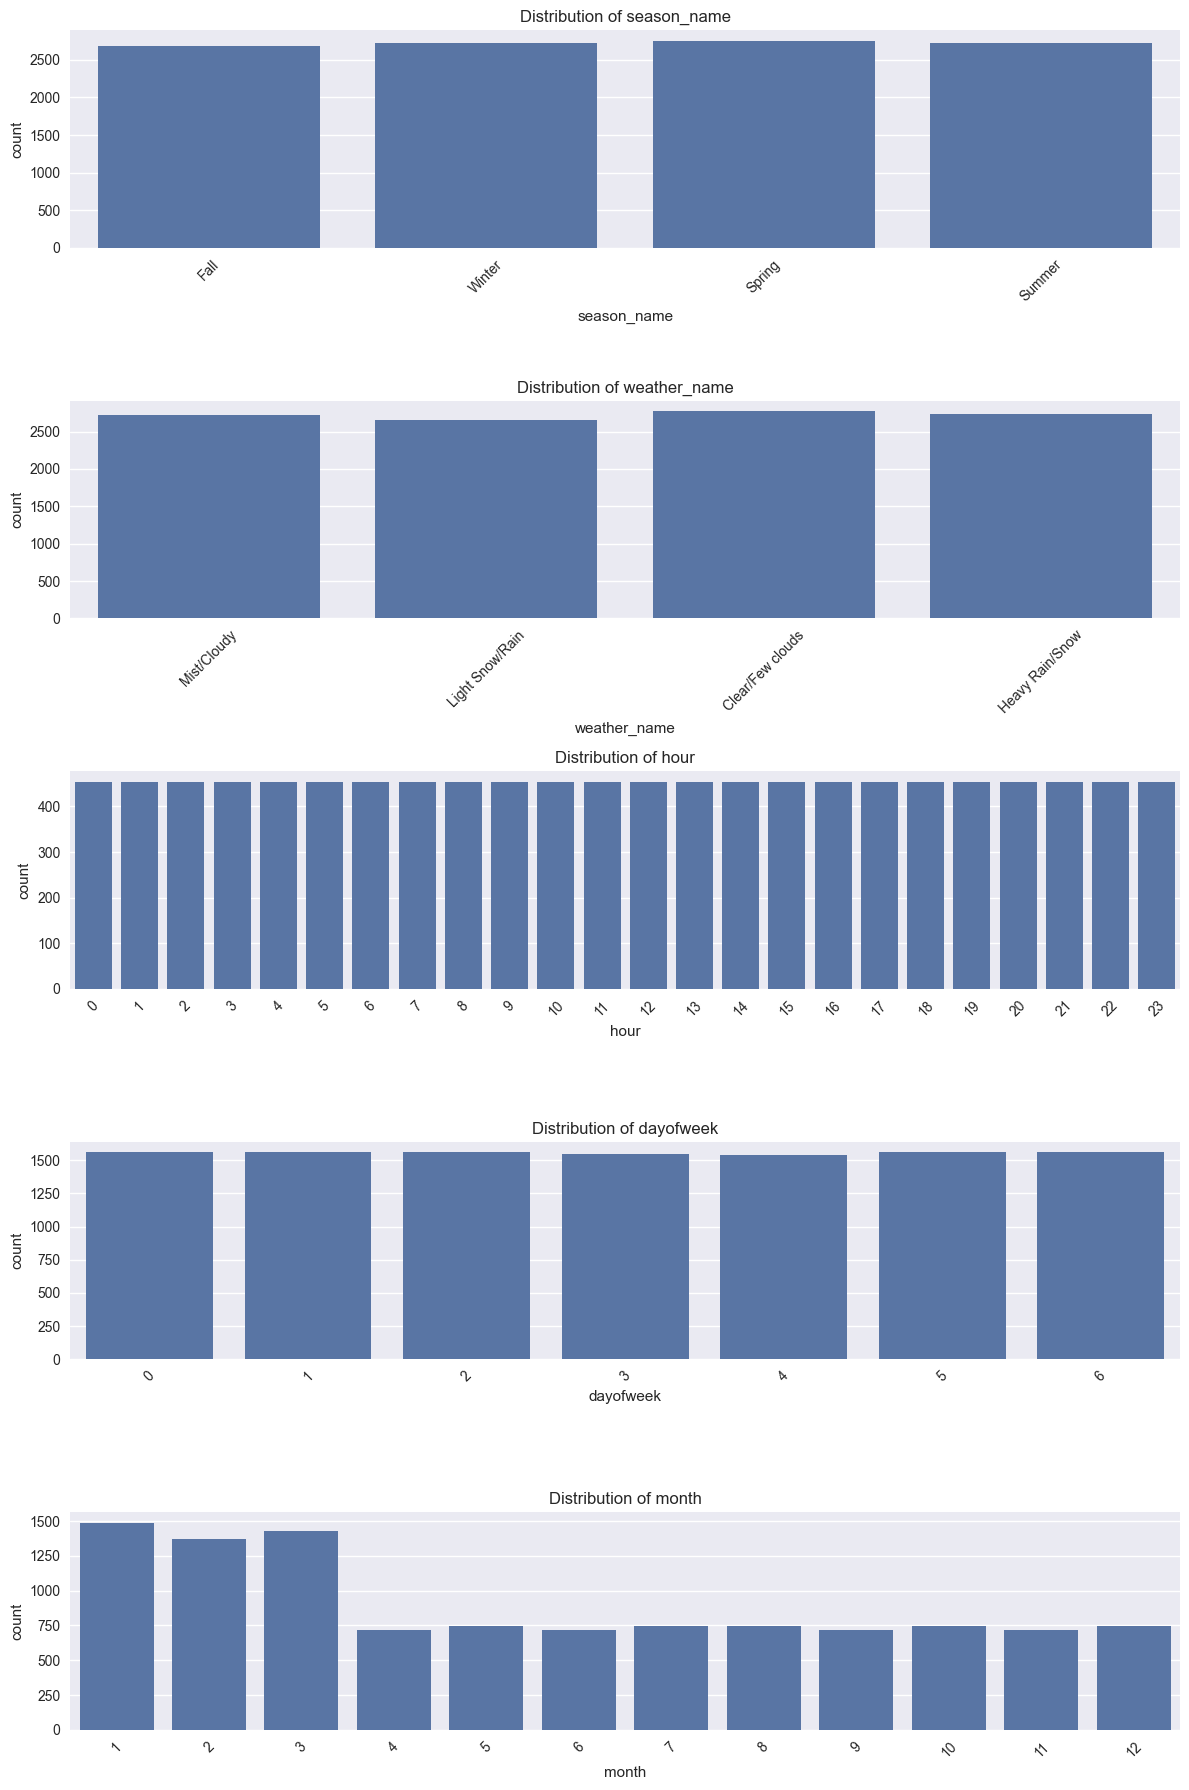

In [32]:

# Plot categorical variables
cat_cols = ['season_name', 'weather_name', 'hour', 'dayofweek', 'month']
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(12, 18))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

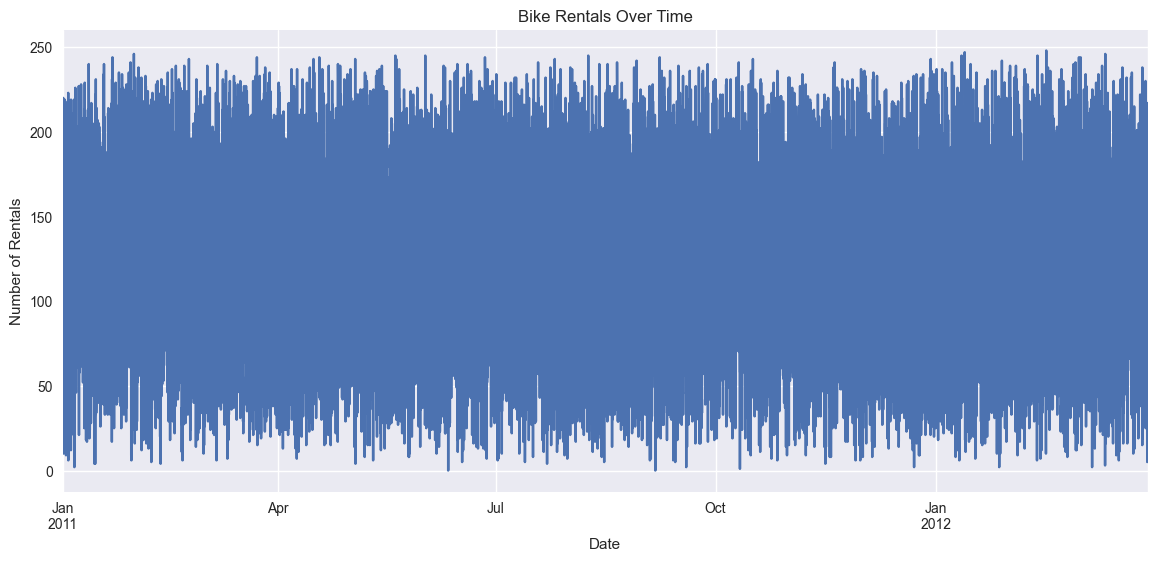

In [33]:
# Time series plot of bike rentals
plt.figure(figsize=(14, 6))
df.set_index('datetime')['count'].plot()
plt.title('Bike Rentals Over Time')
plt.ylabel('Number of Rentals')
plt.xlabel('Date')
plt.show()

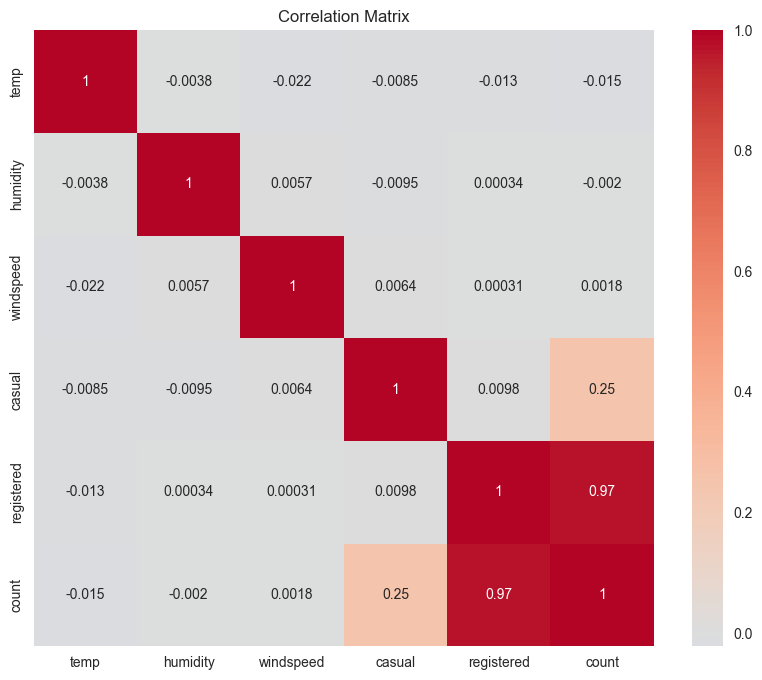

In [34]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# 4. Time Series Analysis
# Resample data to daily frequency for time series analysis
daily_df = df.resample('D', on='datetime').sum()

# Decompose the time series
decomposition = seasonal_decompose(daily_df['count'], period=7)  # Weekly seasonality

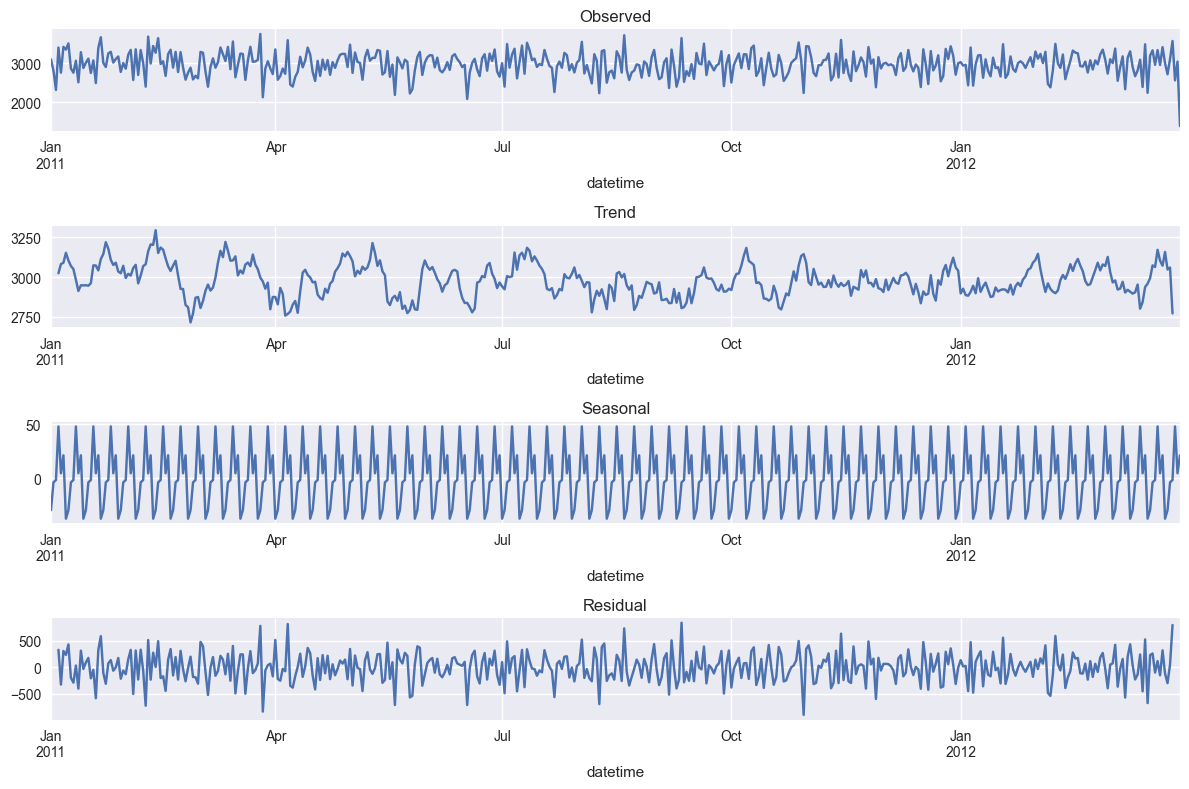

In [36]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
decomposition.observed.plot(ax=plt.gca())
plt.title('Observed')
plt.subplot(412)
decomposition.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(413)
decomposition.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')
plt.subplot(414)
decomposition.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.tight_layout()
plt.show()

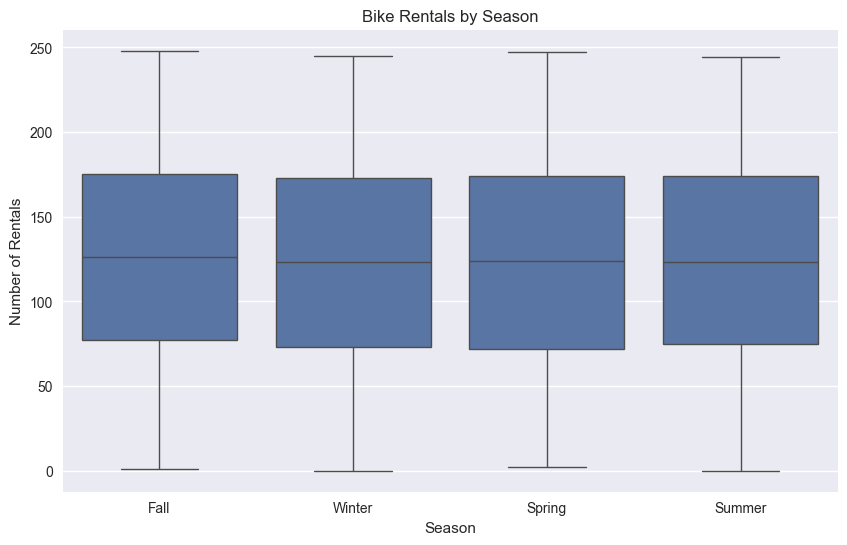

In [37]:
# 5. Feature Analysis
# Analyze rentals by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season_name', y='count')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

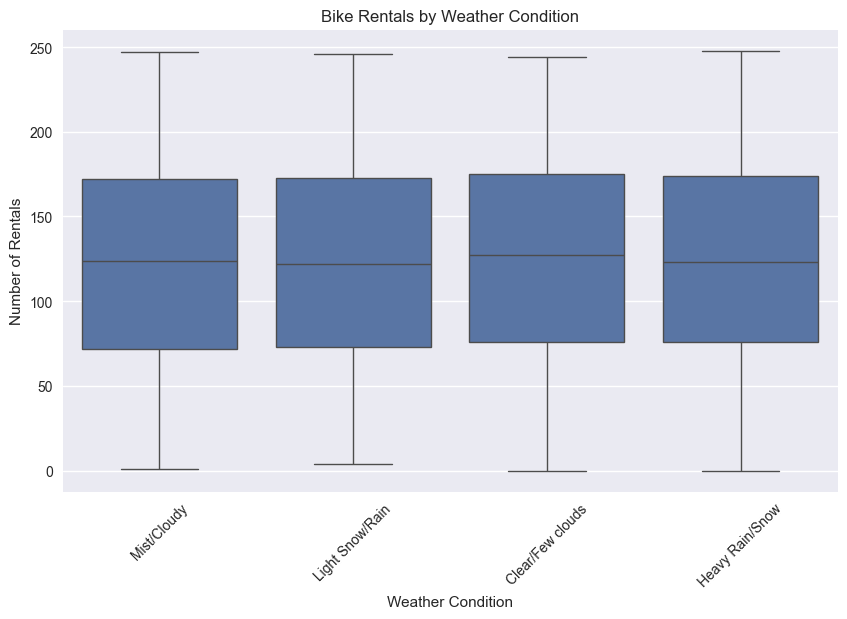

In [38]:
# Analyze rentals by weather
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather_name', y='count')
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.show()

C:\Users\14AC0036AU\AppData\Local\Temp\ipykernel_21848\2856441102.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='count', hue='season_name', ci=None)


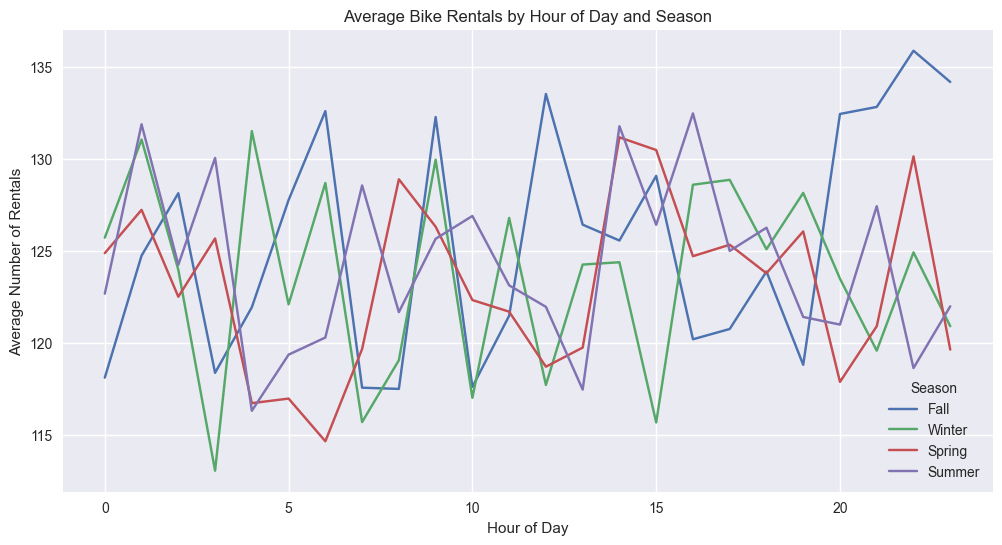

In [39]:
# Analyze rentals by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='count', hue='season_name', ci=None)
plt.title('Average Bike Rentals by Hour of Day and Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.legend(title='Season')
plt.show()


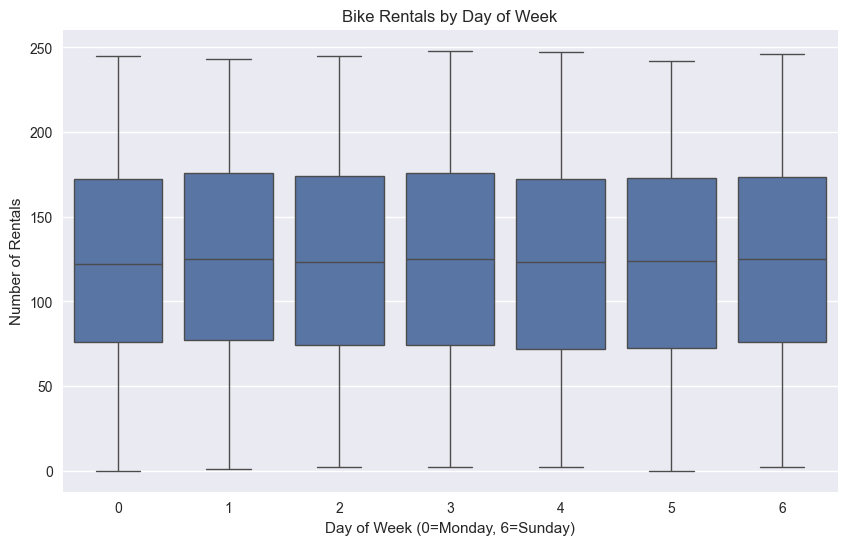

In [40]:
# Analyze rentals by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dayofweek', y='count')
plt.title('Bike Rentals by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Rentals')
plt.show()

In [41]:
# 6. Predictive Modeling
# Prepare data for modeling
features = ['season', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'dayofweek', 'month']
target = 'count'

X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize numerical features
scaler = StandardScaler()
num_features = ['temp', 'humidity', 'windspeed']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
display(coefficients)

Model Evaluation Metrics:
Mean Squared Error: 3407.67
Root Mean Squared Error: 58.38
R-squared: -0.00

Feature Importance:


,Feature,Coefficient
4,windspeed,0.473319
5,hour,0.070065
1,weather,0.054023
0,season,-0.032673
7,month,-0.155838
6,dayofweek,-0.259576
3,humidity,-0.266263
2,temp,-0.655443


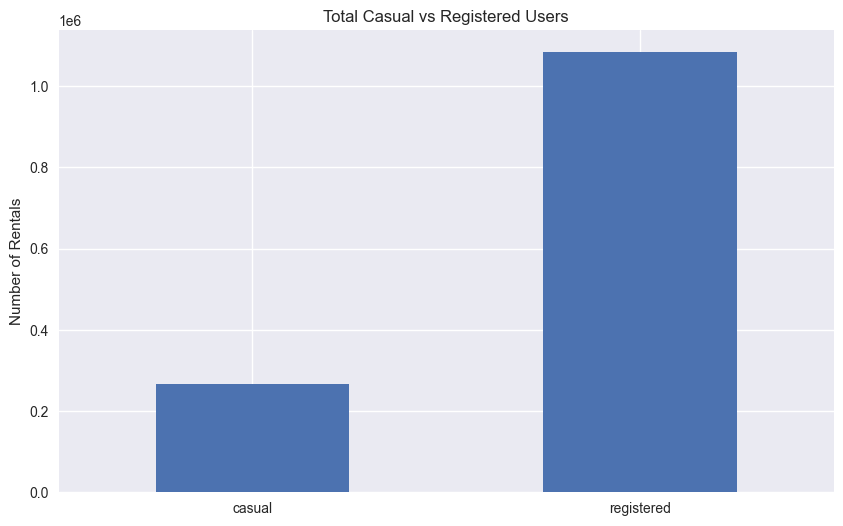

In [43]:
# 7. Additional Analysis
# Compare casual vs registered users
plt.figure(figsize=(10, 6))
df[['casual', 'registered']].sum().plot(kind='bar')
plt.title('Total Casual vs Registered Users')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=0)
plt.show()

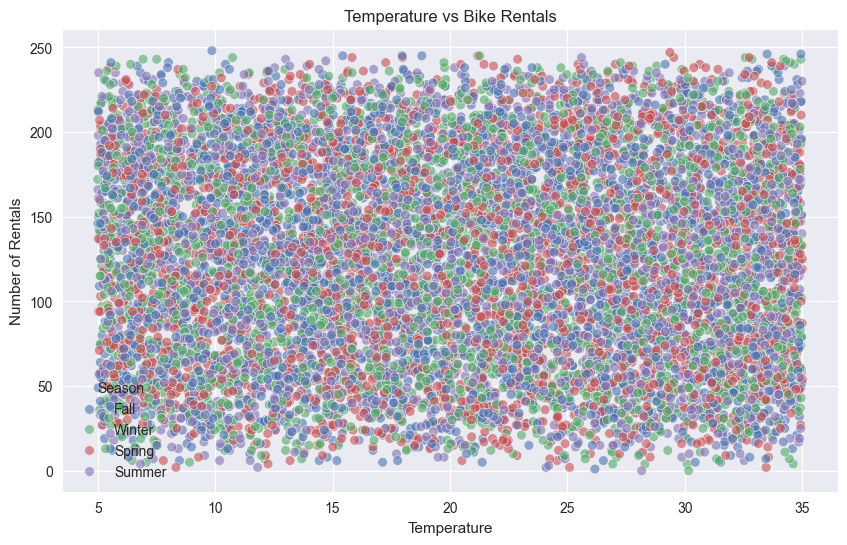

In [44]:
# Analyze temperature vs rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='count', hue='season_name', alpha=0.6)
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.legend(title='Season')
plt.show()

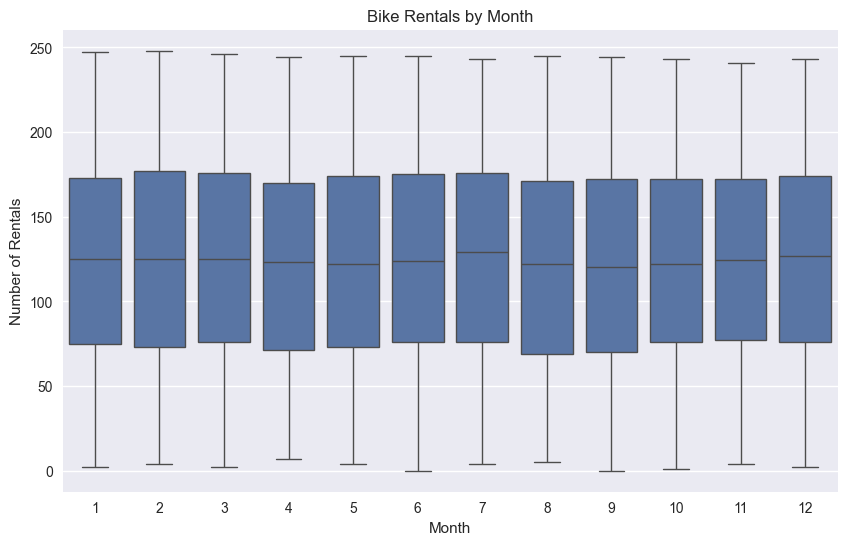

In [45]:
# Analyze rentals by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='count')
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

C:\Users\14AC0036AU\AppData\Local\Temp\ipykernel_21848\2689081631.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='count', hue=df['dayofweek'] < 5, ci=None)


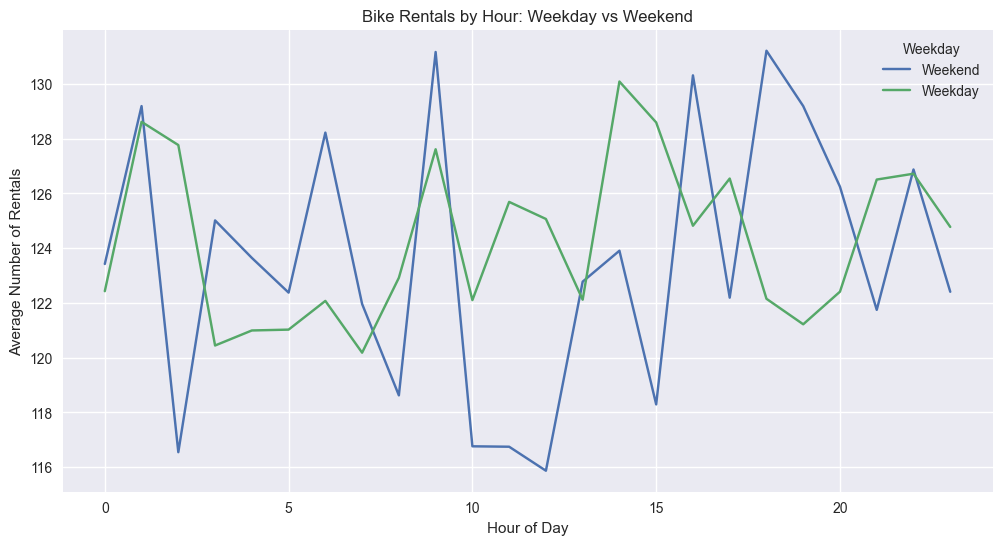

In [46]:
# Analyze working day vs weekend patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='count', hue=df['dayofweek'] < 5, ci=None)
plt.title('Bike Rentals by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.legend(title='Weekday', labels=['Weekend', 'Weekday'])
plt.show()